In [524]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics



0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

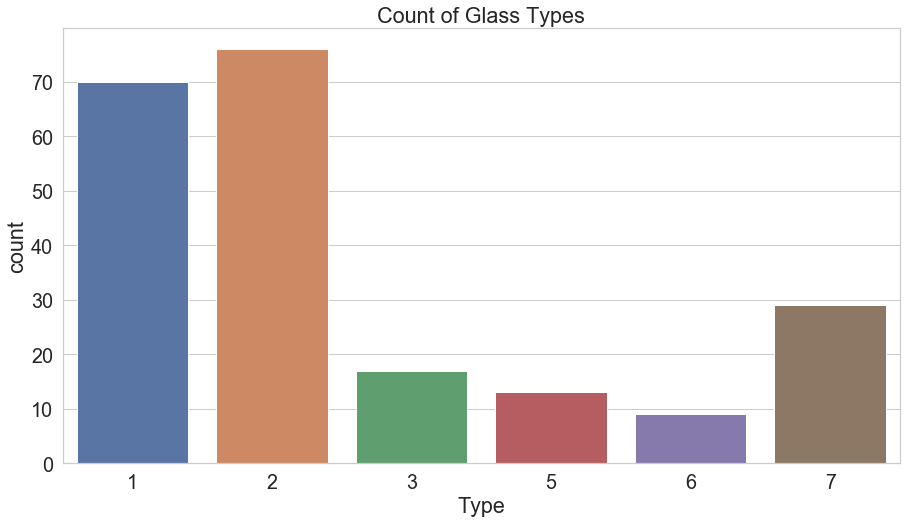

In [525]:
glass_df = pd.read_csv("glass.csv")
glass_df

sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=glass_df).set_title('Count of Glass Types')
Y= glass_df["Type"]
Y.head()

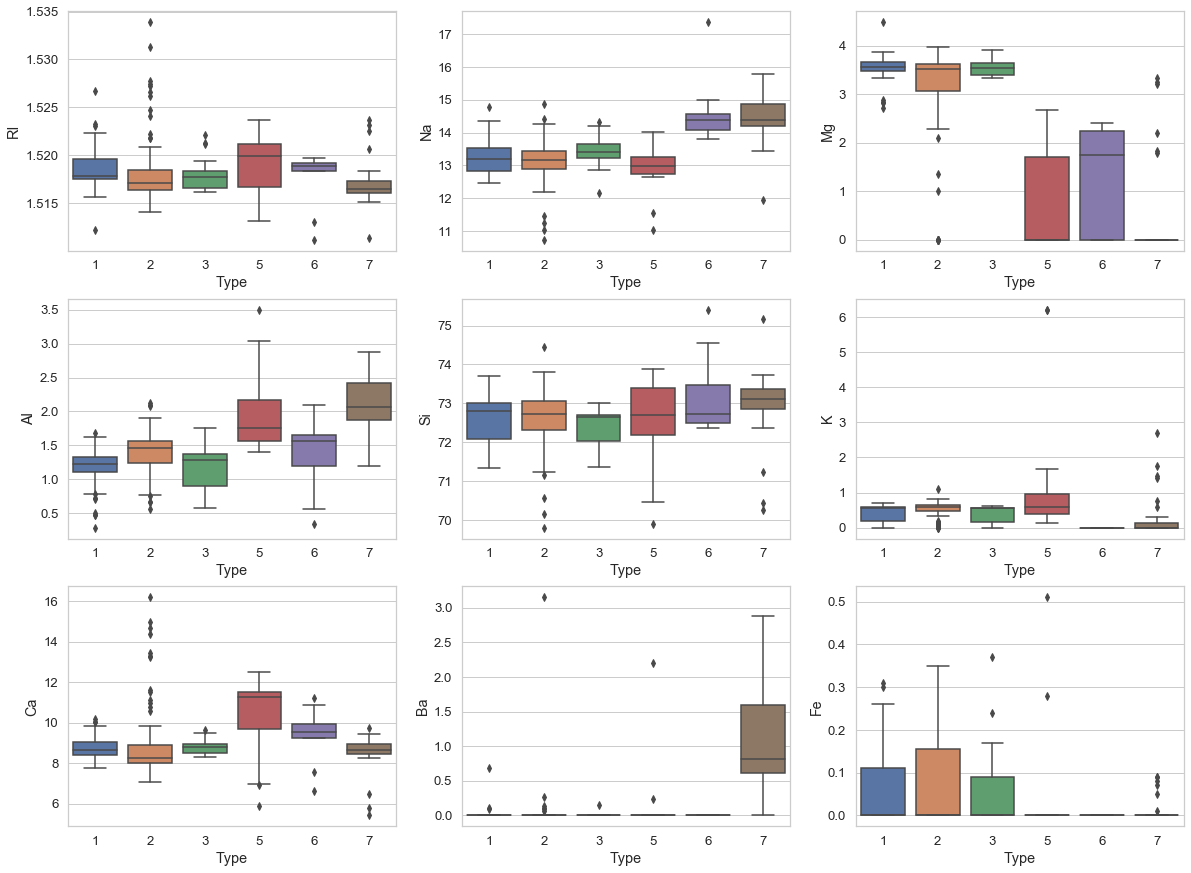

In [526]:

sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_df)
plt.show()

In [527]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [528]:
glass_df = glass_df.drop("Type",axis=1)
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [529]:
glass_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [530]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(glass_df,Y, test_size=0.3,random_state=0)

print(x_train.shape)

(149, 9)


In [531]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
sc1=accuracy_score(y_test, y_pred)

In [532]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
sc2=accuracy_score(y_test, y_pred)

In [533]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier(max_iter=10000)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
sc3=accuracy_score(y_test, y_pred)

In [534]:
pd.DataFrame([['Decision Tree',sc1],['Naive Bayes',sc2],['Neural Networks',sc3],],
                                 columns=['Model','Accuracy'])

,Model,Accuracy
0,Decision Tree,0.630769
1,Naive Bayes,0.461538
2,Neural Networks,0.584615
